# Imports and program variables


In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D, MaxPooling1D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics
import pandas as pd

from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, Conv1D
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint

from sklearn.model_selection import train_test_split # to split dataset into train and test
from sklearn import preprocessing
from keras.preprocessing.sequence import pad_sequences

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from sklearn import preprocessing

from pandas_profiling import ProfileReport
import sys
sys.path.append('../')
from time_series_dataset_loader import TimeSeriesDatasetLoader


Using TensorFlow backend.
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  

In [2]:
def discretization(X):
    new_dataset = []
    for data_instance in X:
        new_instance = []
        for row in data_instance:
            new_instance.append(np.average(row[2:]))
        new_dataset.append(new_instance)
        
    return np.asarray(new_dataset)

In [28]:
def add_padding(X,y):
    X = np.asarray(X)
    y = np.asarray(y)
    
    max_len = len(X[0])
    for row in X:
        if len(row) > max_len:
            max_len = len(row)

    X = pad_sequences(X, maxlen=max_len, padding='post', dtype='float64')
    return X, y

In [41]:
def group_labels(labels):
    new_labels = []
    for value in labels:
        if value in [3,5]:
            new_labels.append(1)
        else:
            new_labels.append(2)
    
    return np.asarray(new_labels)

In [48]:
DATASET_PATH = '../../datasets/Original/MFCC_10'
dataset_loader = TimeSeriesDatasetLoader(DATASET_PATH)
X, y = dataset_loader.get_dataset(type_='default', ignore_neutral=True)

In [49]:
X = discretization(X)
X, y = add_padding(X,y)

In [31]:
X = preprocessing.normalize(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [27]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [52]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

def run_classifier(classifier, params, X_train, X_test, y_train, y_test):
    clf = GridSearchCV(classifier, params)
    clf.fit(X_train, y_train)
    return pd.DataFrame(clf.cv_results_)

In [53]:
### SVM ###

params = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C':[1, 2, 4,5, 6, 8, 10]}
svc = svm.SVC()
run_classifier(svc, params, X_train, X_test, y_train, y_test)

###########

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.223726,0.027879,0.005235,0.000245,1,linear,"{'C': 1, 'kernel': 'linear'}",0.142857,0.200000,0.223022,0.179856,0.187050,0.186557,0.026326,15
1,0.045840,0.002692,0.005852,0.000587,1,poly,"{'C': 1, 'kernel': 'poly'}",0.157143,0.185714,0.208633,0.158273,0.187050,0.179363,0.019466,18
2,0.049356,0.001993,0.006967,0.000936,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.171429,0.250000,0.165468,0.230216,0.194245,0.202271,0.032952,7
3,0.057671,0.001984,0.008804,0.000670,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.185714,0.171429,0.187050,0.187050,0.215827,0.189414,0.014464,12
4,0.413943,0.032810,0.005600,0.001099,2,linear,"{'C': 2, 'kernel': 'linear'}",0.121429,0.192857,0.223022,0.165468,0.165468,0.173649,0.033667,23
5,0.044617,0.001344,0.006361,0.000555,2,poly,"{'C': 2, 'kernel': 'poly'}",0.164286,0.185714,0.201439,0.136691,0.194245,0.176475,0.023476,21
6,0.052351,0.001558,0.007062,0.000412,2,rbf,"{'C': 2, 'kernel': 'rbf'}",0.200000,0.250000,0.208633,0.208633,0.208633,0.215180,0.017728,6
7,0.055200,0.001369,0.009518,0.000495,2,sigmoid,"{'C': 2, 'kernel': 'sigmoid'}",0.178571,0.150000,0.187050,0.187050,0.223022,0.185139,0.023325,17
8,0.767546,0.042936,0.005163,0.000545,4,linear,"{'C': 4, 'kernel': 'linear'}",0.107143,0.178571,0.208633,0.158273,0.165468,0.163618,0.033080,28
9,0.050576,0.001339,0.006178,0.000950,4,poly,"{'C': 4, 'kernel': 'poly'}",0.150000,0.228571,0.201439,0.165468,0.208633,0.190822,0.028859,11


Ie
[[14 14  2  4  6 13]
 [ 8 12  5  5  7 10]
 [ 9  8  6  7 13 13]
 [13  8  8  5  2 12]
 [ 7  7  5  5 12 12]
 [12  6  2  4  3 20]]


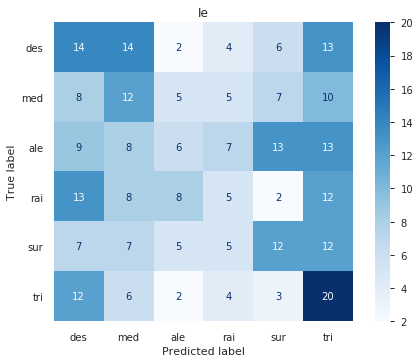

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
title = "Ie"
svc.fit(X_train, y_train)
disp = plot_confusion_matrix(svc, X_test, y_test,
                             display_labels=[
                                'des',
                                'med',
                                'ale',
                                'rai',
                                'sur',
                                'tri'],
                             cmap=plt.cm.Blues)
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

plt.show()

In [55]:
new_predictions  == correct_predictions

array([ True,  True, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False,  True,
       False,  True,  True,  True, False,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True, False,  True, False, False, False,  True,
       False,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True, False,  True,  True,  True,  True, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False,  True,  True, False, False,  True, False,  True, False,
       False,  True,  True, False,  True, False, False,  True, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
       False,  True,

In [56]:
new_predictions = group_labels(svc.predict(X_test))
correct_predictions = group_labels(y_test)

correct = 0
total = len(new_predictions)
for index in range(0, len(new_predictions)):
    if new_predictions[index] == correct_predictions[index]:
        correct += 1
        
print("average: {}".format(correct/total))
    
    

average: 0.6555183946488294


In [44]:
correct_predictions

array([2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [57]:
### LDA ###
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
params = {'solver':['svd', 'lsqr', 'eigen'], 'shrinkage':[None, 'auto']}
clf = LinearDiscriminantAnalysis()
run_classifier(clf, params, X_train, X_test, y_train, y_test)

###########

/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
numpy.linalg.LinAlgError: the leading minor of order 48 of 'b' is not positive definite. The factorization of 'b' could not be completed and no eigenvalues or eigenvectors were computed.

  FitFailedWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
numpy.linalg.LinAlgError: the leading minor of order 46 of 'b' is not positive definite. The factorization of 'b' could not be completed and no eigenvalues or eigenvectors were computed.

  FitFailedWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/py

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_shrinkage,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035889,0.013451,0.001652,0.000666,None,svd,"{'shrinkage': None, 'solver': 'svd'}",0.128571,0.164286,0.194245,0.165468,0.18705,0.167924,0.022919,3
1,0.027669,0.028558,0.001205,0.000882,None,lsqr,"{'shrinkage': None, 'solver': 'lsqr'}",0.128571,0.142857,0.187050,0.187050,0.18705,0.166516,0.025552,4
2,0.025206,0.008455,0.000000,0.000000,None,eigen,"{'shrinkage': None, 'solver': 'eigen'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,0.001275,0.000216,0.000000,0.000000,auto,svd,"{'shrinkage': 'auto', 'solver': 'svd'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,0.033213,0.008068,0.001196,0.000288,auto,lsqr,"{'shrinkage': 'auto', 'solver': 'lsqr'}",0.150000,0.178571,0.194245,0.237410,0.18705,0.189455,0.028297,1
5,0.045771,0.011858,0.001412,0.000581,auto,eigen,"{'shrinkage': 'auto', 'solver': 'eigen'}",0.150000,0.178571,0.194245,0.237410,0.18705,0.189455,0.028297,1


In [61]:
### KNN ###
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
params = {'n_neighbors':[3,5,7,10,50,100], 'weights':['uniform', 'distance'], 
         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
clf = KNeighborsClassifier()
run_classifier(clf, params, X_train, X_test, y_train, y_test)

###########

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003735,0.000692,0.024035,0.004838,auto,3,uniform,"{'algorithm': 'auto', 'n_neighbors': 3, 'weigh...",0.207143,0.207143,0.215827,0.194245,0.194245,0.203720,0.008362,2
1,0.002779,0.000529,0.012773,0.002153,auto,3,distance,"{'algorithm': 'auto', 'n_neighbors': 3, 'weigh...",0.192857,0.221429,0.165468,0.151079,0.194245,0.185015,0.024521,19
2,0.003058,0.000554,0.018928,0.001243,auto,5,uniform,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",0.192857,0.228571,0.230216,0.165468,0.179856,0.199394,0.025988,5
3,0.002826,0.000597,0.011606,0.000987,auto,5,distance,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",0.207143,0.200000,0.187050,0.165468,0.158273,0.183587,0.019002,24
4,0.002695,0.000381,0.018238,0.000841,auto,7,uniform,"{'algorithm': 'auto', 'n_neighbors': 7, 'weigh...",0.178571,0.192857,0.201439,0.172662,0.172662,0.183638,0.011563,21
5,0.003065,0.000474,0.012960,0.001516,auto,7,distance,"{'algorithm': 'auto', 'n_neighbors': 7, 'weigh...",0.185714,0.200000,0.179856,0.136691,0.165468,0.173546,0.021500,41
6,0.002896,0.000731,0.018805,0.001778,auto,10,uniform,"{'algorithm': 'auto', 'n_neighbors': 10, 'weig...",0.207143,0.228571,0.194245,0.165468,0.151079,0.189301,0.027978,13
7,0.002962,0.000378,0.012059,0.001469,auto,10,distance,"{'algorithm': 'auto', 'n_neighbors': 10, 'weig...",0.207143,0.178571,0.179856,0.172662,0.172662,0.182179,0.012828,28
8,0.002955,0.000658,0.020760,0.001392,auto,50,uniform,"{'algorithm': 'auto', 'n_neighbors': 50, 'weig...",0.192857,0.235714,0.143885,0.172662,0.215827,0.192189,0.032150,9
9,0.003127,0.000988,0.013408,0.001179,auto,50,distance,"{'algorithm': 'auto', 'n_neighbors': 50, 'weig...",0.171429,0.214286,0.151079,0.158273,0.215827,0.182179,0.027631,31


In [63]:
clf.fit(X_train, y_train)
new_predictions = group_labels(clf.predict(X_test))
correct_predictions = group_labels(y_test)

correct = 0
total = len(new_predictions)
for index in range(0, len(new_predictions)):
    if new_predictions[index] == correct_predictions[index]:
        correct += 1
        
print("average: {}".format(correct/total))
    
    

average: 0.6220735785953178


In [59]:
### Naive Bayes ###
import numpy as np
from sklearn.naive_bayes import GaussianNB
params = {}
clf = GaussianNB()
run_classifier(clf, params, X_train, X_test, y_train, y_test)

###########

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003853,0.002564,0.00153,0.000532,{},0.178571,0.164286,0.179856,0.18705,0.18705,0.179363,0.008323,1


In [ ]:
ddd

In [64]:
### Decision Tree ###
import numpy as np
from sklearn.tree import DecisionTreeClassifier
params = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'min_samples_split':[2,4,6,10,20,50,100],
         'min_samples_leaf':[1,2,5,10,20,50,100]}
clf = DecisionTreeClassifier()
run_classifier(clf, params, X_train, X_test, y_train, y_test)

###########

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020133,0.007957,0.001021,0.000438,gini,1,2,best,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.142857,0.235714,0.158273,0.158273,0.151079,0.169239,0.033720,170
1,0.005145,0.001136,0.000815,0.000322,gini,1,2,random,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.185714,0.185714,0.215827,0.215827,0.165468,0.193710,0.019513,33
2,0.016086,0.001695,0.000930,0.000567,gini,1,4,best,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.142857,0.228571,0.172662,0.158273,0.179856,0.176444,0.028988,141
3,0.003677,0.000407,0.000531,0.000076,gini,1,4,random,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.171429,0.185714,0.201439,0.251799,0.244604,0.210997,0.031908,2
4,0.015118,0.000983,0.000930,0.000415,gini,1,6,best,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",0.164286,0.228571,0.158273,0.179856,0.172662,0.180730,0.025017,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0.001341,0.000441,0.000656,0.000321,entropy,100,20,random,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.200000,0.192857,0.136691,0.187050,0.187050,0.180730,0.022529,122
192,0.005852,0.001233,0.000746,0.000398,entropy,100,50,best,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.150000,0.150000,0.187050,0.172662,0.194245,0.170791,0.018344,158
193,0.001679,0.001290,0.000488,0.000106,entropy,100,50,random,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.192857,0.171429,0.136691,0.165468,0.208633,0.175015,0.024582,144
194,0.005531,0.001049,0.000721,0.000427,entropy,100,100,best,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.150000,0.150000,0.187050,0.172662,0.194245,0.170791,0.018344,158


In [66]:
clf.fit(X_train, y_train)
new_predictions = group_labels(clf.predict(X_test))
correct_predictions = group_labels(y_test)

correct = 0
total = len(new_predictions)
for index in range(0, len(new_predictions)):
    if new_predictions[index] == correct_predictions[index]:
        correct += 1
        
print("average: {}".format(correct/total))
    
    

average: 0.5652173913043478


In [69]:
### MLP classifier ###

import numpy as np
from sklearn.neural_network import MLPClassifier
params = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.0005, 0.0020, 0.0050, 0.01, 0.05, 0.1, 0.5 ],
    'max_iter': [500]
}

clf = MLPClassifier()
run_classifier(clf, params, X_train, X_test, y_train, y_test)

#####################

/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/skle

/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/

/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/

/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/

/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/skle

/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/

/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/

/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/skle

/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/

/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/

/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/skle

/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.703873,0.526075,0.001974,0.001154,identity,0.0001,500,lbfgs,"{'activation': 'identity', 'alpha': 0.0001, 'm...",0.100000,0.178571,0.215827,0.179856,0.201439,0.175139,0.040068,87
1,4.450263,0.084982,0.003836,0.002720,identity,0.0001,500,sgd,"{'activation': 'identity', 'alpha': 0.0001, 'm...",0.192857,0.157143,0.165468,0.187050,0.230216,0.186547,0.025519,54
2,2.434924,0.434865,0.004699,0.004862,identity,0.0001,500,adam,"{'activation': 'identity', 'alpha': 0.0001, 'm...",0.121429,0.185714,0.223022,0.172662,0.223022,0.185170,0.037644,59
3,3.532122,0.344044,0.002235,0.001379,identity,0.0005,500,lbfgs,"{'activation': 'identity', 'alpha': 0.0005, 'm...",0.100000,0.185714,0.215827,0.179856,0.201439,0.176567,0.040291,82
4,4.471969,0.386872,0.001188,0.000058,identity,0.0005,500,sgd,"{'activation': 'identity', 'alpha': 0.0005, 'm...",0.107143,0.171429,0.172662,0.223022,0.223022,0.179455,0.042745,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,3.100379,0.044418,0.001466,0.000238,relu,0.1,500,sgd,"{'activation': 'relu', 'alpha': 0.1, 'max_iter...",0.185714,0.150000,0.165468,0.215827,0.194245,0.182251,0.022826,72
92,3.526529,0.058601,0.001368,0.000071,relu,0.1,500,adam,"{'activation': 'relu', 'alpha': 0.1, 'max_iter...",0.200000,0.200000,0.244604,0.129496,0.230216,0.200863,0.039673,15
93,2.524579,0.058413,0.001547,0.000158,relu,0.5,500,lbfgs,"{'activation': 'relu', 'alpha': 0.5, 'max_iter...",0.228571,0.235714,0.187050,0.201439,0.215827,0.213720,0.017725,1
94,3.169007,0.075285,0.001436,0.000124,relu,0.5,500,sgd,"{'activation': 'relu', 'alpha': 0.5, 'max_iter...",0.185714,0.164286,0.172662,0.208633,0.201439,0.186547,0.016725,52


In [68]:
clf.fit(X_train, y_train)
new_predictions = group_labels(clf.predict(X_test))
correct_predictions = group_labels(y_test)

correct = 0
total = len(new_predictions)
for index in range(0, len(new_predictions)):
    if new_predictions[index] == correct_predictions[index]:
        correct += 1
        
print("average: {}".format(correct/total))
    
    

average: 0.6053511705685619


/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
X_traincnn = np.expand_dims(X_train, axis=0)
X_testcnn = np.expand_dims(X_test, axis=0)

In [28]:
X_train = X_train.reshape(1, len(X_train), 504)
X_test = X_test.reshape(1, len(X_test), 504)

In [82]:
embedding_size  = 128
kernel_size = 5
filters = 64
pool_size = 4

lstm_output_size = 70

# Training
batch_size = 64
epochs = 100

model = Sequential()
model.add(Embedding(1, embedding_size, input_length=504))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(3))
model.add(Activation('sigmoid'))


from keras.optimizers import SGD
opt = SGD(lr=0.01)
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=['accuracy'])
cnnhistory=model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data=(X_test, y_test))



Train on 998 samples, validate on 428 samples
Epoch 1/100
998/998 [==============================] - 7s 7ms/step - loss: 1.1022 - accuracy: 0.2275 - val_loss: 1.0966 - val_accuracy: 0.4112
Epoch 2/100
998/998 [==============================] - 6s 6ms/step - loss: 1.0964 - accuracy: 0.4248 - val_loss: 1.0918 - val_accuracy: 0.4112
Epoch 3/100
998/998 [==============================] - 6s 6ms/step - loss: 1.0912 - accuracy: 0.4248 - val_loss: 1.0875 - val_accuracy: 0.4112
Epoch 4/100
998/998 [==============================] - 6s 6ms/step - loss: 1.0864 - accuracy: 0.4248 - val_loss: 1.0836 - val_accuracy: 0.4112
Epoch 5/100
998/998 [==============================] - 6s 6ms/step - loss: 1.0823 - accuracy: 0.4248 - val_loss: 1.0799 - val_accuracy: 0.4112
Epoch 6/100
998/998 [==============================] - 6s 6ms/step - loss: 1.0784 - accuracy: 0.4248 - val_loss: 1.0765 - val_accuracy: 0.4112
Epoch 7/100
998/998 [==============================] - 7s 7ms/step - loss: 1.0748 - accuracy: 0.

In [ ]:
batch_size = 256
epochs = 500
from keras.optimizers import SGD
opt = SGD(lr=0.01)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt, metrics=['accuracy'])
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.0000001)
mcp_save = ModelCheckpoint('../model_checkpoints/two_split.h5', save_best_only=True, monitor='val_loss', mode='min')

In [49]:
cnnhistory=model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data=(X_test, y_test))
# , callbacks=[mcp_save, lr_reduce]

ValueError: Error when checking target: expected dense_5 to have shape (1,) but got array with shape (3,)

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 504, 128)          768       
_________________________________________________________________
activation_1 (Activation)    (None, 504, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 504, 64)           41024     
_________________________________________________________________
activation_2 (Activation)    (None, 504, 64)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 504, 64)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 63, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 63, 32)           

array([[[  6.404657  ,  -1.402514  ,  -2.236425  , ...,   0.        ,
           0.        ,   0.        ],
        [  0.8584499 ,  -0.06234932,   0.6381655 , ...,   0.        ,
           0.        ,   0.        ],
        [  5.846846  , -10.07883   , -11.02912   , ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [ 12.99762   ,  -7.800581  ,  -1.155792  , ...,  -0.5558    ,
          -1.747546  ,   3.087212  ],
        [  3.280588  ,   2.007889  ,  -2.019495  , ...,  -0.9734643 ,
           0.8074539 ,   2.71006   ],
        [  5.084667  ,  -3.900648  ,  12.28177   , ...,  -0.7672844 ,
           2.181755  ,   4.326027  ]]])

In [ ]:
''' More Preprocessing '''

In [129]:
from sklearn.preprocessing import RobustScaler

scalers = {}
for i in range(X.shape[1]):
    scalers[i] = RobustScaler()
    X[:, i, :] = scalers[i].fit_transform(X[:, i, :]) 


In [16]:
from sklearn.preprocessing import Normalizer

scalers = {}
for i in range(X.shape[1]):
    scalers[i] = Normalizer()
    X[:, i, :] = scalers[i].fit_transform(X[:, i, :]) 

In [18]:
X[0][0]

array([ 0.        ,  0.        ,  0.28221284,  0.08020835, -0.09187018,
       -0.10788761,  0.62792463,  0.3675004 ,  0.16599244,  0.18636285,
       -0.35420188,  0.19850305, -0.14629544, -0.18601133, -0.21646694,
        0.18571278])

In [16]:
X_train.reshape(1)

ValueError: cannot reshape array of size 502992 into shape (1,)

In [ ]:
''' Finishing Preprocessing '''

In [ ]:
# See X and y details
print(X[:2])
print(X.shape)

print(y[:3])
print(y.shape)

In [41]:
# Split the dataset in train and test

print("\nX_train:\n")
print(X_train[0][0])
print(X_train.shape)

print("\nX_test:\n")
print(X_test[0][0])
print(X_test.shape)

print("\ny_train:\n")
print(y_train[:3])
print(y_train.shape)

print("\ny_test:\n")
print(y_test[:3])
print(y_test.shape)


X_train:

9.105775999999999
(1364, 504)

X_test:

-0.1714754
(585, 504)

y_train:

[2 1 2]
(1364,)

y_test:

[1 2 2]
(585,)


In [42]:
# Create categorical matrices



In [33]:
num_rows = X[0].shape[0]
num_columns = X[0].shape[1]
num_channels = 1

X_train = X_train.reshape(X_train.shape[0], num_rows, num_columns, num_channels)
X_test = X_test.reshape(X_test.shape[0], num_rows, num_columns, num_channels)

print("\nX_train:\n")
print(X_train[0][0])
print(X_train.shape)

print("\nX_test:\n")
print(X_test[0][0])
print(X_test.shape)

IndexError: tuple index out of range

## Building and Compiling Model

In [46]:
# top-k category accuracy
import functools
import keras
top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)
top3_acc.__name__ = 'top3_acc'

# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',top3_acc])

In [47]:
# Define bath and epochs
batch_size = 256
epochs = 400
checkpoint_file = '../models/model_checkpoints/original_window_2.h5'
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',top3_acc])
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.0000001)
mcp_save = ModelCheckpoint('../models/model_checkpoints/two_split.h5', save_best_only=True, monitor='val_loss', mode='min')
cnnhistory=model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data=(X_test, y_test), callbacks=[mcp_save, lr_reduce])

ValueError: Error when checking input: expected conv1d_3_input to have 3 dimensions, but got array with shape (1364, 504)

In [25]:
accuracy_list = cnnhistory.history['val_accuracy']
highest_index = cnnhistory.history['val_accuracy'].index(np.sort(cnnhistory.history['val_accuracy'])[-1])
print(cnnhistory.history['val_accuracy'][highest_index])

0.6239316463470459


In [ ]:
# without prepocessing: 0.5863248109817505
# robust preprocessing: 0.6034188270568848
# normalization: 0.6239316463470459

In [ ]:
import matplotlib.pyplot as plt

# Model Summary

model.summary()

# PLT History info
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()